<a href="https://colab.research.google.com/github/nazzaladiy/PCVK_Genap_2022/blob/master/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


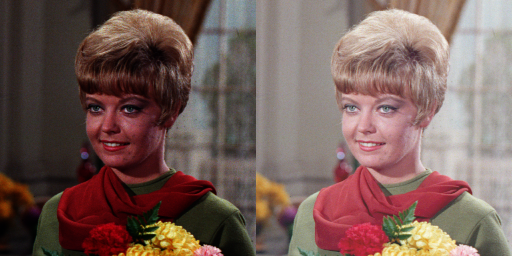

In [ ]:
print(' Gamma Correction pada citra ')
print('-------------------------------')
try: 
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images1/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, 
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit).

 Simulasi Image Depth  
--------------------------
Masukkan nilai Bit Depth: 4


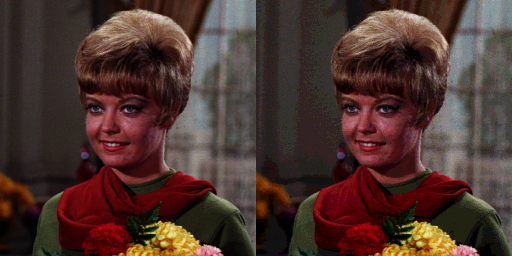

In [ ]:
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images1/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

print(' Simulasi Image Depth  ')
print('--------------------------')
try:
  bd = float(input('Masukkan nilai Bit Depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

3. Buat modul Avarage Denoising

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab 
sebelumnya. 
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg

cv_img = []

for img in glob.glob('/content/drive/MyDrive/Polinema/Kuliah/PCVK/
Images/noises/*.jpg'):

 n= cv.imread(img)
 
 cv_img.append(n)

 Dengan menggunakan code diatas, anda tinggal memanggil image difolder tersebut 
menggunakan cv_img[0], cv_img[1], dst.

Catat hasil PSNR pada tabel berikut. Dari hasil yang sudah anda catat, tuliskan kesimpulan 
anda:

Nilai PSNR adalah 27.53621410984978 (dB)


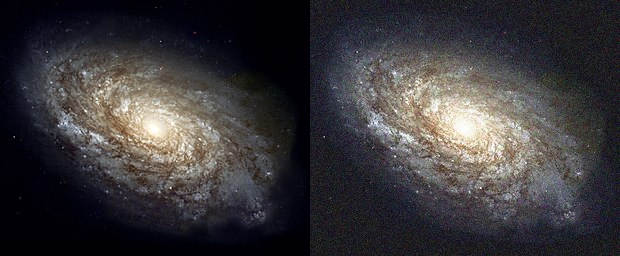

In [ ]:
# 1. Jumlah Citra di Average - 5

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images1/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images1/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.516406288742424 (dB)


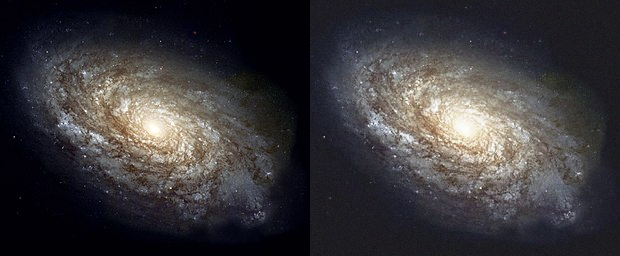

In [ ]:
# 2. Jumlah Citra di Average - 30

dst = cv_img[0]
noise_number = 29
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.484929546494786 (dB)


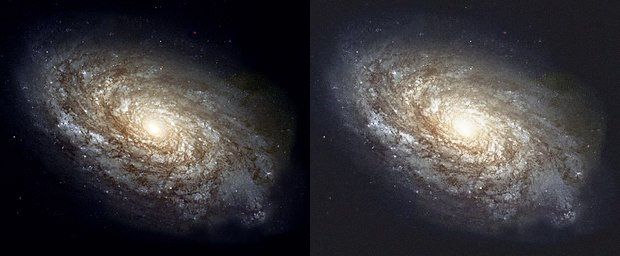

In [ ]:
# 3. Jumlah Citra di Average - 60

dst = cv_img[0]
noise_number = 59
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.508661743006503 (dB)


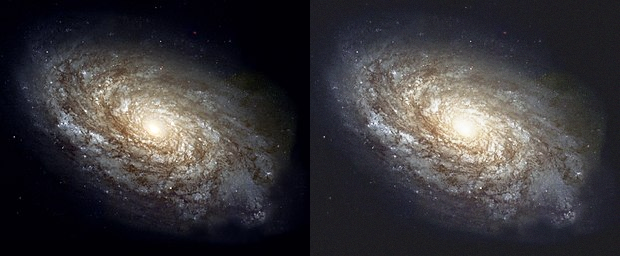

In [ ]:
# 4. Jumlah Citra di Average - 80

dst = cv_img[0]
noise_number = 79
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.51127240781505 (dB)


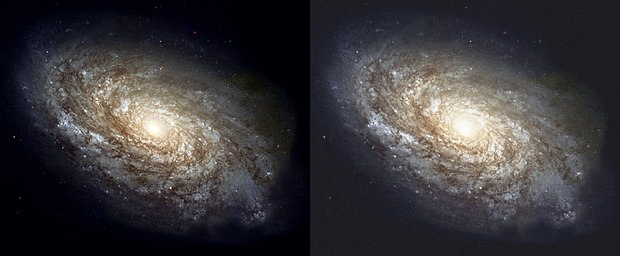

In [ ]:
# 5. Jumlah Citra di Average - 100

dst = cv_img[0]
noise_number = 99
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah.



4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/teeth.jpg), 
sedangkan image kanan adalah hasilnya:

In [ ]:
img_t = cv.imread('/content/drive/MyDrive/PCVK_MM/Images1/teeth.jpg')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.rectangle(mask, (230,230), 225, (255,255,255), -1)

result = img_t & mask

teeth_frame = cv.hconcat((img_t, result))
cv2_imshow(teeth_frame)

TypeError: ignored

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. 
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

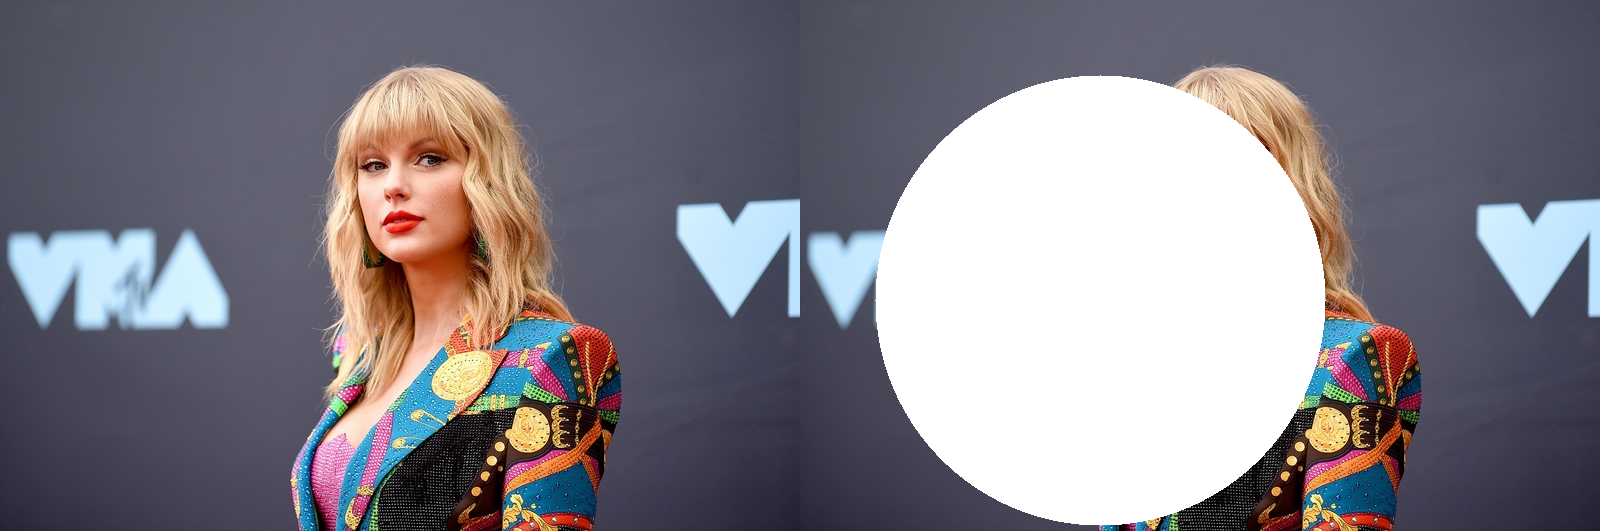

In [ ]:
# Operator OR 

img_org = cv.imread('/content/drive/MyDrive/PCVK_MM/Images1/taylor.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (300,300), 225, (255,255,255), -1)

result = img_org | mask

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

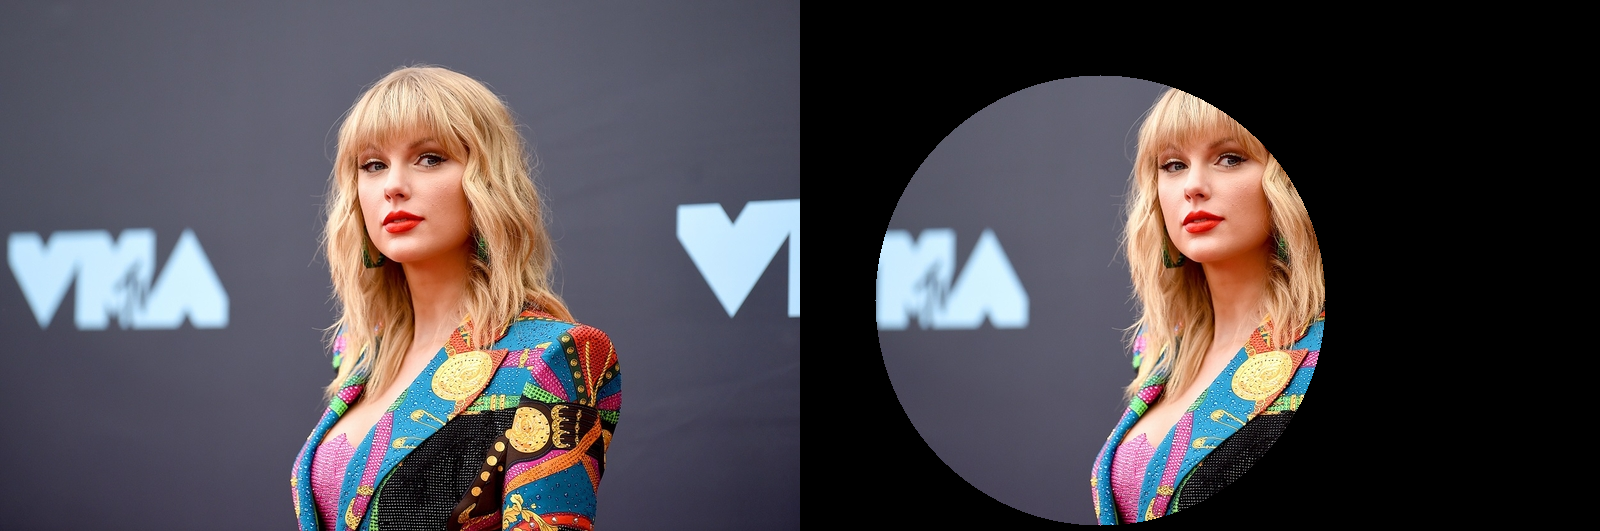

In [ ]:
# Operator AND

img_org = cv.imread('/content/drive/MyDrive/PCVK_MM/Images1/taylor.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (300,300), 225, (255,255,255), -1)

result = img_org & mask

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

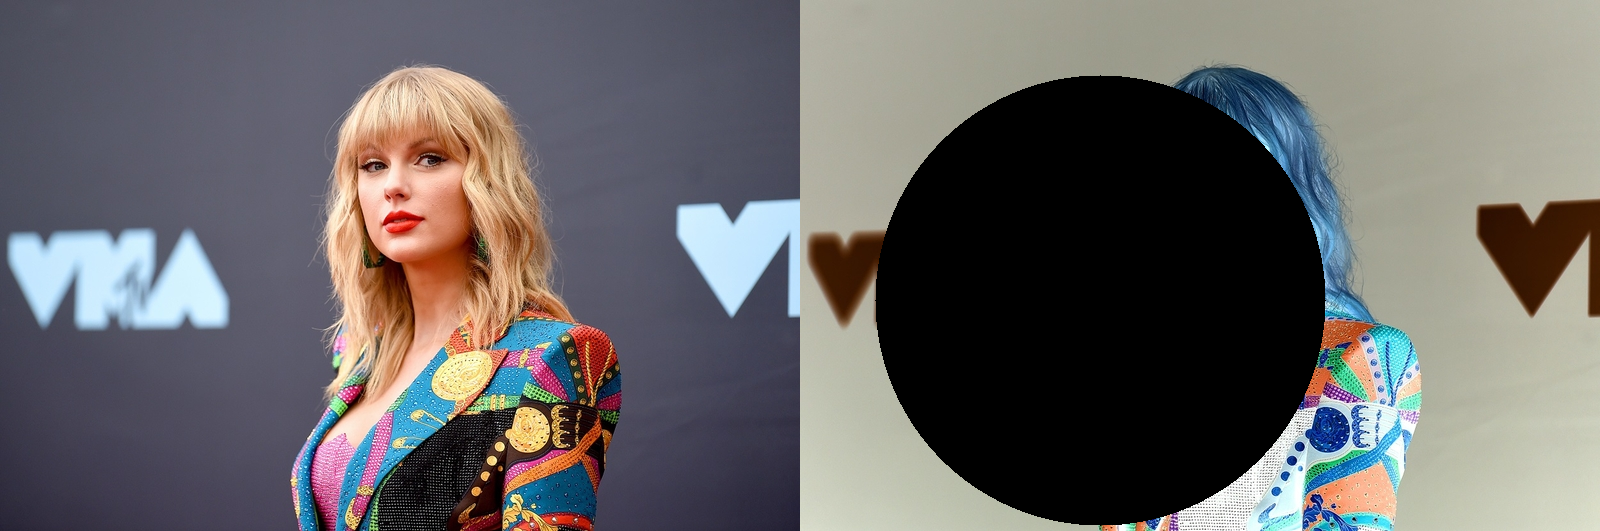

In [ ]:
# Operator NOT

img_org = cv.imread('/content/drive/MyDrive/PCVK_MM/Images1/taylor.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (300,300), 225, (255,255,255), -1)

result = ~img_org & ~mask

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)